In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [33]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SAHAYOGA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SAHAYOGA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [34]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SAHAYOGA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\SAHAYOGA\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [35]:
df = pd.read_csv(r"C:\Users\Sahayoga\Desktop\case_study\case study\CSV_Files\Karriere\karriere_python.csv")
df.head()

,Unnamed: 0,title,text,url
0,0,Softwareentwickler Python (m/w/d) - Python Sof...,Wien Festanstellung Direktvermittlung Jobnr. 4...,https://www.karriere.at/jobs/6560789
1,1,"Semantische Suche, Web Intelligence und Visual...",Stellenausschreibung • Dezember 2022 Semantisc...,https://www.karriere.at/jobs/6544274
2,2,Backend Developer (Python) (f/m/d) bei PALFING...,We are one of Austria’s first corporate start-...,https://www.karriere.at/jobs/6270545
3,3,Python/Linux Developer Machine Learning (m/w/d...,Python/Linux Developer Machine Learning (m/w/d...,https://www.karriere.at/jobs/6351146
4,4,Python and C++ Developer (m/w/x) bei epunkt Gm...,Python and C++ Developer (m/w/x) Do you like t...,https://www.karriere.at/jobs/6605255


In [36]:
df.shape

(532, 4)

In [37]:
def cleanDescription(descText):
    descText = descText.lower() #converting to lowercase
    descText = re.sub('http\S+\s*', ' ', descText)  # remove URLs
    descText = re.sub('RT|cc', ' ', descText)  # remove RT and cc
    descText = re.sub('#\S+', '', descText)  # remove hashtags
    descText = re.sub('@\S+', '  ', descText)  # remove mentions
    descText = re.sub(r'[0-9]', '', descText) # remove numbers
    descText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', descText)  # remove punctuations
    #descText = re.sub(r'[^\x00-\x7f]',r' ', descText) # remove non Non ASCII CHarecter
    descText = re.sub('\s+', ' ', descText)  # remove extra whitespace
    return descText 

In [38]:
df['cleaned_re'] = df['text'].apply(lambda x:cleanDescription(x))
df.head() 

,Unnamed: 0,title,text,url,cleaned_re
0,0,Softwareentwickler Python (m/w/d) - Python Sof...,Wien Festanstellung Direktvermittlung Jobnr. 4...,https://www.karriere.at/jobs/6560789,wien festanstellung direktvermittlung jobnr un...
1,1,"Semantische Suche, Web Intelligence und Visual...",Stellenausschreibung • Dezember 2022 Semantisc...,https://www.karriere.at/jobs/6544274,stellenausschreibung • dezember semantische su...
2,2,Backend Developer (Python) (f/m/d) bei PALFING...,We are one of Austria’s first corporate start-...,https://www.karriere.at/jobs/6270545,we are one of austria’s first corporate start ...
3,3,Python/Linux Developer Machine Learning (m/w/d...,Python/Linux Developer Machine Learning (m/w/d...,https://www.karriere.at/jobs/6351146,python linux developer machine learning m w d ...
4,4,Python and C++ Developer (m/w/x) bei epunkt Gm...,Python and C++ Developer (m/w/x) Do you like t...,https://www.karriere.at/jobs/6605255,python and c developer m w x do you like to th...


In [39]:
def text_clean_2(text):
  stop_words = set(stopwords.words('english'))
  word_tokens = word_tokenize(text)
  filtered_sentence = []
  wnl = WordNetLemmatizer()
 
  for w in word_tokens:
      if w not in stop_words:
          filtered_sentence.append(w)
  lemmatized_string = ' '.join([wnl.lemmatize(words) for words in filtered_sentence])
  return lemmatized_string         
  #return filtered_sentence

In [40]:
df['cleaned_text'] = df['cleaned_re'].apply(lambda x:text_clean_2(x))
df.head(2)

,Unnamed: 0,title,text,url,cleaned_re,cleaned_text
0,0,Softwareentwickler Python (m/w/d) - Python Sof...,Wien Festanstellung Direktvermittlung Jobnr. 4...,https://www.karriere.at/jobs/6560789,wien festanstellung direktvermittlung jobnr un...,wien festanstellung direktvermittlung jobnr un...
1,1,"Semantische Suche, Web Intelligence und Visual...",Stellenausschreibung • Dezember 2022 Semantisc...,https://www.karriere.at/jobs/6544274,stellenausschreibung • dezember semantische su...,stellenausschreibung • dezember semantische su...


In [41]:
#getting the entire resume text
corpus=" "
for i in range(0,532):
    corpus= corpus+ df["cleaned_text"][i]

In [42]:
import nltk
from nltk.corpus import stopwords
sw_nltk = stopwords.words('german')

alpha_word = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n' 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
#new_word = ['un', 'ber', 'sowie','erfahrung','al','innen','de','au','sungen','bereich', 'bieten', 'kenntnisse','gute','benefit', 'ab','service', 'arbeiten','kunden','flexible', 'unternehmen','bewerben', 'wien', 'office','experience','eur', 'technologien','unterst','unserer', 'ausbildung', 'position', 'qualifikation', 'work', 'job', 'mitarbeiter', 'aufgaben','bi', 'teil','design','online', 'freuen','glichkeiten','web', 'vollzeit', 'weiterentwicklung', 'arbeitszeiten','u', 'h', 'gmbh', 'working', 'bewerbung','test', 'pers', 'brutto','suchen','brz','hast','qualit','glich','htl','je','home', 'business','mehr','system','glichkeit', 'technology','engineering', 'solution', 'gerne','gehalt','vorteil','gro','technische','fh','neue', 'gemeinsam','skill','umsetzung','abgeschlossene','homeoffice','sterreich','berzahlung','www','international','dabei', 'ngig','bzw', 'nnen', 'partner','know', 'zusammenarbeit','anforderungen','tzen','gesch','etc', 'higkeit', 'recruiting', 'zukunft', 'neuen','englischkenntnisse', 'interesse','tzung', 'level', 'hrung','linz','knowledge','company', 'time','mitarbeit','integration','abh', 'full', 'weitere', 'profil','new','event', 'applikationen','erste','erfahrungen','austria','internationalen','verg','bringen','standort','kannst', 'basis','sofort','menschen','leben', 'verst','life','group', 'gr','weiterbildung', 'stack','verf','tzt', 'net', 'salary','uni','monat','erm', 'bereichen','graz','mindestens','kontakt','arbeit','environment','anwendungen']
new_word = ['abhängig', 'unterstützung', 'möglich', 'mehrjährige', 'unterstützt', 'unterstützen','durchführung', 'österreich','möglichkeit', 'lösungen', 'überzahlung', '•','berufserfahrung','un', 'ber', 'sowie','erfahrung','al','innen','de','au','sungen','bereich', 'bieten', 'kenntnisse','gute','benefit', 'ab','service', 'arbeiten','kunden','flexible', 'unternehmen','bewerben', 'wien', 'office','experience','eur', 'technologien','unterst','unserer', 'ausbildung', 'position', 'qualifikation', 'work', 'job', 'mitarbeiter', 'aufgaben','bi', 'teil','design','online', 'freuen','glichkeiten','web', 'vollzeit', 'weiterentwicklung', 'arbeitszeiten','u', 'h', 'gmbh', 'working', 'bewerbung','test', 'pers', 'brutto','suchen','brz','hast','qualit','glich','htl','je','home', 'business','mehr','system','glichkeit', 'technology','engineering', 'solution', 'gerne','gehalt','vorteil','gro','technische','fh','neue', 'gemeinsam','skill','umsetzung','abgeschlossene','homeoffice','sterreich','berzahlung','www','international','dabei', 'ngig','bzw', 'nnen', 'partner','know', 'zusammenarbeit','anforderungen','tzen','gesch','etc', 'higkeit', 'recruiting', 'zukunft', 'neuen','englischkenntnisse', 'interesse','tzung', 'level', 'hrung','linz','knowledge','company', 'time','mitarbeit','integration','abh', 'full', 'weitere', 'profil','new','event', 'applikationen','erste','erfahrungen','austria','internationalen','verg','bringen','standort','kannst', 'basis','sofort','menschen','leben', 'verst','life','group', 'gr','weiterbildung', 'stack','verf','tzt', 'net', 'salary','uni','monat','erm', 'bereichen','graz','mindestens','kontakt','arbeit','environment','anwendungen','liegt','st', 'erstellung','part','pr','mehrj','spannende', 'mindestgehalt','art','rund','ten','idealerweise','softwarel','bereitschaft','arbeitest','stellen','com','hrige','datenbanken','weltweit','ro','arbeitsweise','end', 'gesundheit','requirement','studium','qualifikationen', 'gt', 'selbstst','bringst','expert', 'arbeitsumfeld','karriere','jahre', 'angebot','regelm','bereits','offer','modernen', 'konzeption','umgang', 'ideen', 'onboarding', 'ren', 'architektur', 'implementierung', 'frau', 'ndige','high', 'good', 'customer', 'tech', 'chancengleichheit','en', 'user', 'inkl','mail','verantwortung','well''informationen','neuer','leidenschaft','rolle', 'erwartet','mobile','durchf','zahlreiche','arbeitsplatz', 'jahren','beim', 'kollektivvertrag','nstigungen','year','pro','top','freude', 'per','wiener', 'salzburg','weiterbildungen','process','gut','ffentliche','opportunity', 'ndig','hohe','betrieb','wissen','anbindung','glichen','kund','looking','aktiv','lebenslauf','welt', 'diverse','themen','wort','weiterbildungsm','lage','gesamten', 'balance', 'kv', 'sport', 'gross', 'geh', 'bietet','optimierung', 'like', 'platform','vielfalt','zusammen', 'apply', 'performance', 'schrift','stehen','ort','bewirb', 'gen', 'hour', 'based', 'quality', 'ansprechpartner','fundierte','state','innovativen','people', 'ansprechperson','tze', 'schwerpunkt','beko', 'qualification','individuelle','jahresbruttogehalt']

sw_nltk.extend(alpha_word)
sw_nltk.extend(new_word)

text = corpus
words = [word for word in text.split() if word.lower() not in sw_nltk]
sentence1 = " ".join(words)

#print(new_text)
print("Old length: ", len(text))
print("New length: ", len(sentence1))

Old length:  1499197
New length:  994138


# Running the Banking  File

In [43]:
df_bk = pd.read_csv(r"C:\Users\Sahayoga\Desktop\case_study\case study\CSV_Files\Karriere\karriere_banking.csv")
df_bk.head()

,Unnamed: 0,title,text,url
0,0,Finance Project Manager bei ALSTOM Transport A...,We create smart innovations to meet the mobili...,https://www.karriere.at/jobs/6626390
1,1,Junior Privatkundenberater:in im Innendienst/A...,Die Pegasos Finance Gmbh ist eines der führend...,https://www.karriere.at/jobs/6612797
2,2,Intern Corporate Finance Solutions (all gender...,Working at Erste Group means pursuing a common...,https://www.karriere.at/jobs/6577136
3,3,Consultant (m/w/d) Corporate Finance /Transakt...,Für unseren Standort in Graz suchen wir Sie Co...,https://www.karriere.at/jobs/6486356
4,4,Business Development Manager for Supply Chain ...,"""I think coming together is the first step in ...",https://www.karriere.at/jobs/6559868


In [44]:
df_fn = pd.read_csv(r"C:\Users\Sahayoga\Desktop\case_study\case study\CSV_Files\Karriere\karriere_finance.csv")
df_fn.head()

,Unnamed: 0,title,text,url
0,0,Finance Project Manager bei ALSTOM Transport A...,We create smart innovations to meet the mobili...,https://www.karriere.at/jobs/6626390
1,1,Junior Privatkundenberater:in im Innendienst/A...,Die Pegasos Finance Gmbh ist eines der führend...,https://www.karriere.at/jobs/6612797
2,2,Intern Corporate Finance Solutions (all gender...,Working at Erste Group means pursuing a common...,https://www.karriere.at/jobs/6577136
3,3,Consultant (m/w/d) Corporate Finance /Transakt...,Für unseren Standort in Graz suchen wir Sie Co...,https://www.karriere.at/jobs/6486356
4,4,Business Development Manager for Supply Chain ...,"""I think coming together is the first step in ...",https://www.karriere.at/jobs/6559868


In [45]:
df_1 = [df_bk, df_fn]
df_1 = pd.concat([df_bk, df_fn], ignore_index=True, sort=False)

In [46]:
df_1=df_1.drop("url", axis='columns')

In [47]:
df_1=df_1.drop("Unnamed: 0", axis='columns')

In [48]:
def cleanDescription(descText):
    descText = descText.lower() #converting to lowercase
    descText = re.sub('http\S+\s*', ' ', descText)  # remove URLs
    descText = re.sub('RT|cc', ' ', descText)  # remove RT and cc
    descText = re.sub('#\S+', '', descText)  # remove hashtags
    descText = re.sub('@\S+', '  ', descText)  # remove mentions
    descText = re.sub(r'[0-9]', '', descText) # remove numbers
    descText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', descText)  # remove punctuations
    #descText = re.sub(r'[^\x00-\x7f]',r' ', descText) # remove non Non ASCII CHarecter
    descText = re.sub('\s+', ' ', descText)  # remove extra whitespace
    return descText

In [49]:
df_1['cleaned_re'] = df_1['text'].apply(lambda x:cleanDescription(x))
df_1.head() 

,title,text,cleaned_re
0,Finance Project Manager bei ALSTOM Transport A...,We create smart innovations to meet the mobili...,we create smart innovations to meet the mobili...
1,Junior Privatkundenberater:in im Innendienst/A...,Die Pegasos Finance Gmbh ist eines der führend...,die pegasos finance gmbh ist eines der führend...
2,Intern Corporate Finance Solutions (all gender...,Working at Erste Group means pursuing a common...,working at erste group means pursuing a common...
3,Consultant (m/w/d) Corporate Finance /Transakt...,Für unseren Standort in Graz suchen wir Sie Co...,für unseren standort in graz suchen wir sie co...
4,Business Development Manager for Supply Chain ...,"""I think coming together is the first step in ...",i think coming together is the first step in ...


In [50]:
def text_clean_2(text):
  stop_words = set(stopwords.words('english'))
  word_tokens = word_tokenize(text)
  filtered_sentence = []
  wnl = WordNetLemmatizer()
 
  for w in word_tokens:
      if w not in stop_words:
          filtered_sentence.append(w)
  lemmatized_string = ' '.join([wnl.lemmatize(words) for words in filtered_sentence])
  return lemmatized_string         
  #return filtered_sentence

In [51]:
df_1['cleaned_text'] = df_1['cleaned_re'].apply(lambda x:text_clean_2(x))
df_1.head(2)

,title,text,cleaned_re,cleaned_text
0,Finance Project Manager bei ALSTOM Transport A...,We create smart innovations to meet the mobili...,we create smart innovations to meet the mobili...,create smart innovation meet mobility challeng...
1,Junior Privatkundenberater:in im Innendienst/A...,Die Pegasos Finance Gmbh ist eines der führend...,die pegasos finance gmbh ist eines der führend...,die pegasos finance gmbh ist eines der führend...


In [52]:
df_1=df_1.drop("cleaned_re", axis='columns')
df_1

,title,text,cleaned_text
0,Finance Project Manager bei ALSTOM Transport A...,We create smart innovations to meet the mobili...,create smart innovation meet mobility challeng...
1,Junior Privatkundenberater:in im Innendienst/A...,Die Pegasos Finance Gmbh ist eines der führend...,die pegasos finance gmbh ist eines der führend...
2,Intern Corporate Finance Solutions (all gender...,Working at Erste Group means pursuing a common...,working erste group mean pursuing common goal ...
3,Consultant (m/w/d) Corporate Finance /Transakt...,Für unseren Standort in Graz suchen wir Sie Co...,für unseren standort graz suchen wir sie consu...
4,Business Development Manager for Supply Chain ...,"""I think coming together is the first step in ...",think coming together first step working toget...
...,...,...,...
1683,(Junior) Legal Counsel - Media and Marketing b...,Full-time\t (Junior) Legal Counsel - Media and...,full time junior legal counsel medium marketin...
1684,Internship Project Management (all genders) #w...,We are part of Erste Group – the largest banki...,part erste group – largest banking group centr...
1685,BuchhalterIn für nachhaltiges Unternehmen – fl...,"Du bist digitalaffin, smarte Technologien bege...",du bist digitalaffin smarte technologien begei...
1686,(Senior-) Underwriter I Casualty CSEE (m/w/d) ...,(Senior-) Underwriter I Casualty CSEE (m/w/d) ...,senior underwriter casualty csee w permanent p...


In [53]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
 
stop_words = stopwords.words('german')
df_1['text_woStopwords'] = df_1['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SAHAYOGA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
df_1=df_1.drop("title", axis='columns')
df_1=df_1.drop("text", axis='columns')
df_1=df_1.drop("cleaned_text", axis='columns')
df_1.head(2)

,text_woStopwords
0,create smart innovation meet mobility challeng...
1,pegasos finance gmbh führenden unabhängigen fi...


In [55]:
cell_text = print(df_1["text_woStopwords"].values[3])
print(cell_text)

standort graz suchen consultant w corporate finance transaktionsberatung rabelpartner aufgaben eingespielten team eingebettet leisten wertvolle beiträge lösung betriebswirtschaftlichen fragestellungen kunden insbesondere jahresabschluss planungs markt wettbewerbsanalysen sowie erstellung financial model dadurch tragen kunden sensiblen entscheidungen bestmöglich unterstützen schwerpunkt unserer beratung liegt unternehmensbewertungen sanierungen unternehmenstransaktionen lernbereitschaft enge zusammenarbeit erfahrenen kolleg innen steile lernkurve durchlaufen weitere karriereschritte ermöglichen profil abgeschlossenes einschlägiges bachelor masterstudium gute m office kenntnisse angebot mitarbeit hochmotivierten jungen team sichere berufliche perspektive flexible arbeitszeitmodelle attraktives karrieremodell weitreichende unterstützung finanzierung au fortbildungen mentorenprogramm ab ersten arbeitstag ausgezeichnetes betriebsklima hochmoderner unternehmensstandort guter öffentlicher ver

In [56]:
df_1.shape

(1688, 1)

In [57]:
#getting the entire resume text
Bank_corpus=" "
for i in range(0,1688):
    Bank_corpus= Bank_corpus+ df_1["text_woStopwords"][i]

In [58]:
import nltk
from nltk.corpus import stopwords
sw_nltk = stopwords.words('german')

alpha_word = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n' 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
#new_word = ['un', 'ber', 'sowie','erfahrung','al','innen','de','au','sungen','bereich', 'bieten', 'kenntnisse','gute','benefit', 'ab','service', 'arbeiten','kunden','flexible', 'unternehmen','bewerben', 'wien', 'office','experience','eur', 'technologien','unterst','unserer', 'ausbildung', 'position', 'qualifikation', 'work', 'job', 'mitarbeiter', 'aufgaben','bi', 'teil','design','online', 'freuen','glichkeiten','web', 'vollzeit', 'weiterentwicklung', 'arbeitszeiten','u', 'h', 'gmbh', 'working', 'bewerbung','test', 'pers', 'brutto','suchen','brz','hast','qualit','glich','htl','je','home', 'business','mehr','system','glichkeit', 'technology','engineering', 'solution', 'gerne','gehalt','vorteil','gro','technische','fh','neue', 'gemeinsam','skill','umsetzung','abgeschlossene','homeoffice','sterreich','berzahlung','www','international','dabei', 'ngig','bzw', 'nnen', 'partner','know', 'zusammenarbeit','anforderungen','tzen','gesch','etc', 'higkeit', 'recruiting', 'zukunft', 'neuen','englischkenntnisse', 'interesse','tzung', 'level', 'hrung','linz','knowledge','company', 'time','mitarbeit','integration','abh', 'full', 'weitere', 'profil','new','event', 'applikationen','erste','erfahrungen','austria','internationalen','verg','bringen','standort','kannst', 'basis','sofort','menschen','leben', 'verst','life','group', 'gr','weiterbildung', 'stack','verf','tzt', 'net', 'salary','uni','monat','erm', 'bereichen','graz','mindestens','kontakt','arbeit','environment','anwendungen']
new_word = ['berufserfahrung','un', 'ber', 'sowie','erfahrung','al','innen','de','au','sungen','bereich', 'bieten', 'kenntnisse','gute','benefit', 'ab','service', 'arbeiten','kunden','flexible', 'unternehmen','bewerben', 'wien', 'office','experience','eur', 'technologien','unterst','unserer', 'ausbildung', 'position', 'qualifikation', 'work', 'job', 'mitarbeiter', 'aufgaben','bi', 'teil','design','online', 'freuen','glichkeiten','web', 'vollzeit', 'weiterentwicklung', 'arbeitszeiten','u', 'h', 'gmbh', 'working', 'bewerbung','test', 'pers', 'brutto','suchen','brz','hast','qualit','glich','htl','je','home', 'business','mehr','system','glichkeit', 'technology','engineering', 'solution', 'gerne','gehalt','vorteil','gro','technische','fh','neue', 'gemeinsam','skill','umsetzung','abgeschlossene','homeoffice','sterreich','berzahlung','www','international','dabei', 'ngig','bzw', 'nnen', 'partner','know', 'zusammenarbeit','anforderungen','tzen','gesch','etc', 'higkeit', 'recruiting', 'zukunft', 'neuen','englischkenntnisse', 'interesse','tzung', 'level', 'hrung','linz','knowledge','company', 'time','mitarbeit','integration','abh', 'full', 'weitere', 'profil','new','event', 'applikationen','erste','erfahrungen','austria','internationalen','verg','bringen','standort','kannst', 'basis','sofort','menschen','leben', 'verst','life','group', 'gr','weiterbildung', 'stack','verf','tzt', 'net', 'salary','uni','monat','erm', 'bereichen','graz','mindestens','kontakt','arbeit','environment','anwendungen','liegt','st', 'erstellung','part','pr','mehrj','spannende', 'mindestgehalt','art','rund','ten','idealerweise','softwarel','bereitschaft','arbeitest','stellen','com','hrige','datenbanken','weltweit','ro','arbeitsweise','end', 'gesundheit','requirement','studium','qualifikationen', 'gt', 'selbstst','bringst','expert', 'arbeitsumfeld','karriere','jahre', 'angebot','regelm','bereits','offer','modernen', 'konzeption','umgang', 'ideen', 'onboarding', 'ren', 'architektur', 'implementierung', 'frau', 'ndige','high', 'good', 'customer', 'tech', 'chancengleichheit','en', 'user', 'inkl','mail','verantwortung','well''informationen','neuer','leidenschaft','rolle', 'erwartet','mobile','durchf','zahlreiche','arbeitsplatz', 'jahren','beim', 'kollektivvertrag','nstigungen','year','pro','top','freude', 'per','wiener', 'salzburg','weiterbildungen','process','gut','ffentliche','opportunity', 'ndig','hohe','betrieb','wissen','anbindung','glichen','kund','looking','aktiv','lebenslauf','welt', 'diverse','themen','wort','weiterbildungsm','lage','gesamten', 'balance', 'kv', 'sport', 'gross', 'geh', 'bietet','optimierung', 'like', 'platform','vielfalt','zusammen', 'apply', 'performance', 'schrift','stehen','ort','bewirb', 'gen', 'hour', 'based', 'quality', 'ansprechpartner','fundierte','state','innovativen','people', 'ansprechperson','tze', 'schwerpunkt','beko', 'qualification','individuelle','jahresbruttogehalt']

sw_nltk.extend(alpha_word)
sw_nltk.extend(new_word)

text = Bank_corpus
words = [word for word in text.split() if word.lower() not in sw_nltk]
sentence2 = " ".join(words)

#print(new_text)
print("Old length: ", len(text))
print("New length: ", len(sentence2 ))

Old length:  3926383
New length:  3110321


In [59]:
def common_words(sentence1, sentence2):
    # split the sentences into lists of words
    words1 = sentence1.split()
    words2 = sentence2.split()
    
    # use set intersection to get the common words
    common = set(words1).intersection(words2)
    
    # convert the set back to a list and return it
    return list(common)

# print(common_words(sentence1, sentence2))
Common_words = common_words(sentence1, sentence2)
Common_words

['pkw',
 'ethnicity',
 'modernster',
 'bisherige',
 'screening',
 'empathy',
 'führungskraft',
 'cd',
 'vorteilhaft',
 'methodological',
 'deutschkenntnissen',
 'motiviertes',
 'straßen',
 'feiern',
 'zugang',
 'broadcast',
 'konzernen',
 'dublin',
 'ci',
 'verwendeten',
 'robotic',
 'elektro',
 'zurück',
 'mindern',
 'aggregation',
 'strategisches',
 'medizin',
 'youtube',
 'mal',
 'firmenrabatte',
 'roll',
 'nachhaltigste',
 'gesmbh',
 'meidling',
 'land',
 'negotiation',
 'reduce',
 'jahreskarte',
 'authorization',
 'nav',
 'bundespensionskasse',
 'außergewöhnliche',
 'sanction',
 'fixum',
 'einhaltung',
 'chain',
 'kundenanforderungen',
 'erhöhung',
 'netzwerk',
 'efficiently',
 'einkauf',
 'headquarter',
 'ige',
 'phone',
 'workflow',
 'driver',
 'qualitätsstandards',
 'bietest',
 'tunnel',
 'really',
 'datenmengen',
 'steyr',
 'affinity',
 'richtungsweisende',
 'tochter',
 'weiblichen',
 'daten',
 'competition',
 'file',
 'brennst',
 'technologieführer',
 'gruppe',
 'productivity

In [61]:
UnwantedWords = ['abhängig', 'unterstützung', 'möglich', 'mehrjährige', 'unterstützt', 'unterstützen','durchführung', 'österreich','möglichkeit', 'lösungen', 'überzahlung']
sw_nltk.extend(Common_words)
sw_nltk.extend(UnwantedWords)

text = corpus
words = [word for word in text.split() if word.lower() not in sw_nltk]
NewCleanedText = " ".join(words)

#print(new_text)
print("Old length: ", len(sentence1))
print("New length: ", len(NewCleanedText ))

Old length:  994138
New length:  193867


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(NewCleanedText)

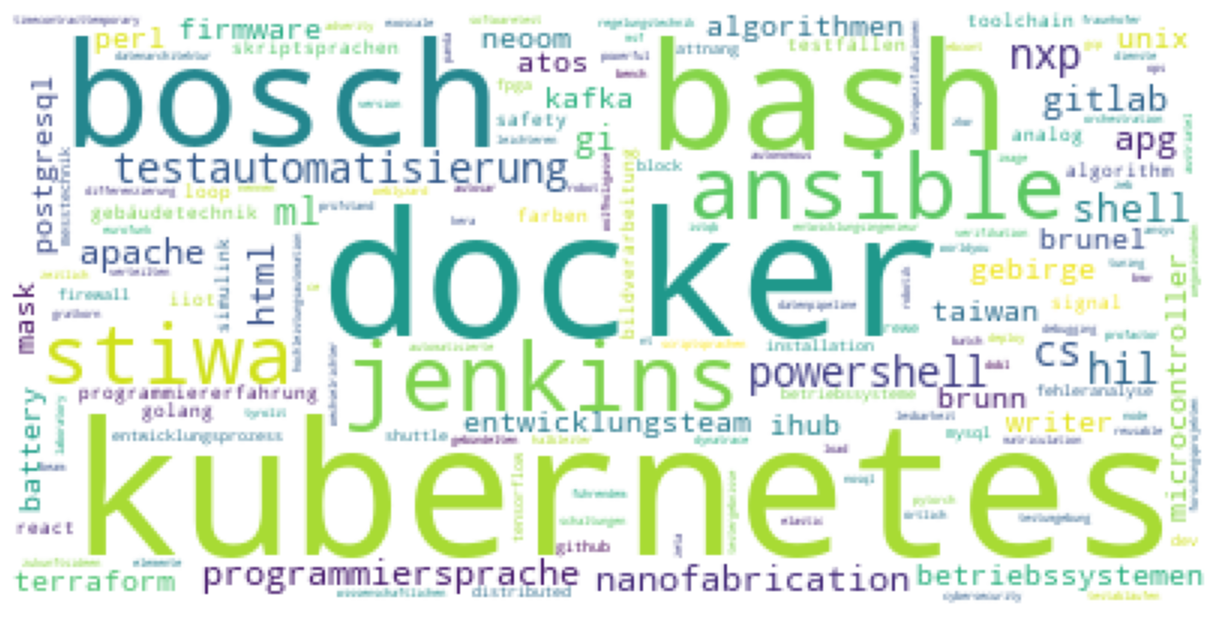

In [63]:
plt.figure(figsize = (12,12), facecolor = None)
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad = 0)

In [64]:
tokenizer = nltk.tokenize.RegexpTokenizer('w+')
#Tokenizing the text
tokens = nltk.word_tokenize(NewCleanedText)
#tokens = tokenizer.tokenize(corpus)
len(NewCleanedText)

193867

In [65]:
freq_dist = nltk.FreqDist(tokens)
mostcommon = freq_dist.most_common(1000)
mostcommon

[('kubernetes', 75),
 ('docker', 65),
 ('bash', 47),
 ('bosch', 46),
 ('jenkins', 41),
 ('•', 40),
 ('ansible', 38),
 ('stiwa', 33),
 ('testautomatisierung', 31),
 ('cs', 30),
 ('powershell', 28),
 ('hil', 28),
 ('nxp', 27),
 ('ml', 25),
 ('shell', 25),
 ('programmiersprache', 25),
 ('gi', 25),
 ('gitlab', 24),
 ('apg', 24),
 ('html', 23),
 ('apache', 23),
 ('nanofabrication', 23),
 ('algorithmen', 22),
 ('\ue501', 22),
 ('ihub', 22),
 ('unix', 21),
 ('brunn', 21),
 ('gebirge', 21),
 ('terraform', 20),
 ('firmware', 20),
 ('postgresql', 19),
 ('battery', 19),
 ('♦', 19),
 ('mask', 19),
 ('neoom', 18),
 ('writer', 18),
 ('brunel', 18),
 ('atos', 18),
 ('kafka', 17),
 ('betriebssystemen', 17),
 ('taiwan', 17),
 ('perl', 17),
 ('programmiererfahrung', 16),
 ('react', 16),
 ('iiot', 16),
 ('farben', 16),
 ('skriptsprachen', 16),
 ('safety', 16),
 ('simulink', 16),
 ('algorithm', 15),
 ('bildverarbeitung', 15),
 ('loop', 15),
 ('testfällen', 15),
 ('\ue508', 15),
 ('gebäudetechnik', 15),
 (

### END

In [66]:
import pandas as pd

# Sample sentence
sentence = NewCleanedText

# Split the sentence into words
words = sentence.split()

# Calculate the number of rows required
num_rows = (len(words) + 199) // 200

# Create a DataFrame with the required number of rows
df_Words = pd.DataFrame({'Words': ['']*num_rows})

# Populate each row of the DataFrame with up to 200 words
for i in range(num_rows):
    start_index = i * 200
    end_index = min((i+1) * 200, len(words))
    df_Words.iloc[i] = ' '.join(words[start_index:end_index])

# Print the resulting DataFrame
print(df_Words)

                                                Words
0   ausprobieren mitarbeiterbedürfnisse jahrhunder...
1   kafka docker kubernetes mechanic backed qualif...
2   datenflüsse databricks dbt gitlab terraform op...
3   wn wieneuro plaza wagenseilgasse jeweilige ent...
4   literature diplomarbeit einmaligen ausländerbe...
..                                                ...
75  gewöhnlich gauselmann unterhaltung cashpoint s...
76  verbrauch berechnungssoftware methodenentwickl...
77  verifizierungsdokumentation testtools testauto...
78  baseline interferometrie vlbi referenzsysteme ...
79  benutzeroberflächen postgresql vegetarischen h...

[80 rows x 1 columns]


In [67]:
df_Words.to_csv("Cleaned_words_k_py.csv", index= False) 